# Julia Package Development

> Computational Analysis of Social Complexity
>
> Fall 2025, Spencer Lyon

**Prerequisites**

- Laptop or personal computer with internet connection
- Julia intro lecture
- Julia Modules lecture

**Outcomes**

- Installing, uninstalling, and updating packages
- Managing a Project.toml file and understanding the related Manifest.toml
- Create new Julia packages to organize code snippets

**References**

- Lecture notes
- Julia documentation on [packages](https://docs.julialang.org/en/v1/stdlib/Pkg/)
- Pkg.jl standard library [docs](https://pkgdocs.julialang.org/v1/)


## Introduction

* Julia is a very powerful, modern language
* It comes packed with many essential components for creating high performing numerical programs
    * [Arrays](https://docs.julialang.org/en/v1/manual/arrays/)
    * [Parallel processing](https://docs.julialang.org/en/v1/manual/distributed-computing/)
    * [Multi threading](https://docs.julialang.org/en/v1/manual/multi-threading/)
    * [Calling C code](https://docs.julialang.org/en/v1/manual/calling-c-and-fortran-code/)
    * ... and many more
* However, Julia also has a thriving 3rd party library ecosystem ([ML](https://fluxml.ai/), [Plotting](https://docs.juliaplots.org/), [Notebooks](https://plutojl.org/), [Differential Equations](https://docs.sciml.ai/DiffEqDocs/stable/), and more)
* Julia libraries are known as packages
* Today we will learn how to manage and develop packages

## Package Management

* To start, let's learn how to manage Julia packages
* There are two primary methods for managing packages:
    * Importing and calling functions from the `Pkg` standard library package
    * Using the `pkg` REPL mode from the main Julia REPL
* We will learn both here
* First, we'll import the `Pkg` package


```{note}
Examples of the `pkg` REPL mode will be pasted here for you to view
```

In [1]:
import Pkg

### Installing

* To install a package use `Pkg.add("PACKAGE_NAME")`
* Below we install the popular `CSV` package used for handling CSV files in Julia

In [6]:
Pkg.add("CSV")

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [944b1d66] + CodecZlib v0.7.8
  [34da2185] + Compat v4.18.0
  [9a962f9c] + DataAPI v1.16.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.24
  [842dd82b] + InlineStrings v1.4.4
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [bac558e1] + OrderedCollections v1.8.1
  [2dfb63ee] + PooledArrays v1.4.3
  [91c51154] + SentinelArrays v1.4.8
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.12.1
  [3bb67fe8] + TranscodingStreams v0.11.3
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [9fa8497b] + Future v1.11.0


* To use the `pkg` REPL mode, I first start the repl by running `julia` in my terminal
* Then I press `]` to enter Pkg mode 
    * REPL prompt chanegs to `(@v1.11) pkg>` (where `v1.11` represents my Julia system version)
* Once here I run `add CSV` to get the following output:

```text
(@v1.11) pkg> add CSV
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [944b1d66] + CodecZlib v0.7.8
  [34da2185] + Compat v4.18.0
  [9a962f9c] + DataAPI v1.16.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.24
  [842dd82b] + InlineStrings v1.4.4
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [bac558e1] + OrderedCollections v1.8.1
  [2dfb63ee] + PooledArrays v1.4.3
  [91c51154] + SentinelArrays v1.4.8
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.12.1
  [3bb67fe8] + TranscodingStreams v0.11.3
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [9fa8497b] + Future v1.11.0
```

### Checking Status

* To check the `status` of my packages, I can use the `Pkg.status` function  or `status` command at the pkg REPL

In [7]:
Pkg.status()

Status `~/.julia/environments/v1.11/Project.toml`
  [336ed68f] CSV v0.10.15
⌃ [7073ff75] IJulia v1.29.2
Info Packages marked with ⌃ have new versions available and may be upgradable.


```txt
(@v1.11) pkg> status
Status `~/.julia/environments/v1.11/Project.toml`
  [336ed68f] CSV v0.10.15
⌃ [7073ff75] IJulia v1.29.2
Info Packages marked with ⌃ have new versions available and may be upgradable.
```

* The printout here will show one line per explicity installed package (not transitive dependencies)
* The format of each line is `_ [ID] NAME VERSION` where 
    * `ID` is the beginning of a universially unique identifier (UUID) that identifies the package in the Julia ecosystem
    * `NAME` is the name of the package
    * `VERSION` is the installed version number
    * `_` is a placeholder for possible version updates. These placeholders will be explained beneath the list of packages

### Updating

* Notice how our printout shows we have version v1.29.2 of IJulia, but that there is an update available
* To update to the latest verison (reccomended for security and features) we use the `Pkg.udpate` function or `up` REPL command
* If we run `pkg> up`, Julia will attempt to get the latest version of all installed packages (same for `Pkg.update()`)
* If instead we do `pkg> up IJulia`, Julia will only update IJulia (same for `Pkg.update("IJulia")`)

```txt
(@v1.11) pkg> up IJulia
    Updating registry at `~/.julia/registries/General.toml`
    Updating `~/.julia/environments/v1.11/Project.toml`
  [7073ff75] ↑ IJulia v1.29.2 ⇒ v1.30.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [7073ff75] ↑ IJulia v1.29.2 ⇒ v1.30.0
  [b85f4697] - SoftGlobalScope v1.1.0
```

* Now running `status` does not show that IJulia has a newer available version

In [8]:
Pkg.status()

Status `~/.julia/environments/v1.11/Project.toml`
  [336ed68f] CSV v0.10.15
  [7073ff75] IJulia v1.30.0


### Uninstalling

* To uninstall a package we can use the `Pkg.rm("NAME")` functino or `pkg> rm NAME` REPL command:|


In [12]:
Pkg.rm("CSV")

    Updating `~/.julia/environments/v1.11/Project.toml`
  [336ed68f] - CSV v0.10.15
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [336ed68f] - CSV v0.10.15
  [944b1d66] - CodecZlib v0.7.8
  [34da2185] - Compat v4.18.0
  [9a962f9c] - DataAPI v1.16.0
  [e2d170a0] - DataValueInterfaces v1.0.0
  [48062228] - FilePathsBase v0.9.24
  [842dd82b] - InlineStrings v1.4.4
  [82899510] - IteratorInterfaceExtensions v1.0.0
  [bac558e1] - OrderedCollections v1.8.1
  [2dfb63ee] - PooledArrays v1.4.3
  [91c51154] - SentinelArrays v1.4.8
  [3783bdb8] - TableTraits v1.0.1
  [bd369af6] - Tables v1.12.1
  [3bb67fe8] - TranscodingStreams v0.11.3
  [ea10d353] - WeakRefStrings v1.4.2
  [76eceee3] - WorkerUtilities v1.6.1
  [9fa8497b] - Future v1.11.0


* Status now shows we no longer have CSV

In [13]:
Pkg.status()

Status `~/.julia/environments/v1.11/Project.toml`
  [7073ff75] IJulia v1.30.0


## Environments

* Notice above when managing packages, I always saw the following at the top of the file:

```txt
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
```

* This was a hint to how Julia keeps its packages organized...
* Whenever we are working in Julia, there is always an **environment** active
* By default, the environment is specific to the user account (`~/` is UNIX shorthand for current user's home directory) and the Julia version number (`v1.11`)
* This means that all packages we install will be available any time someone starts Julia v1.11 from my user account


### Environment Management

* Having a single, global environment is very convenient for simple tasks and exploration
* However, for larger software or research projects, it is a best practice to have an environment specific for that project
* The Julia package manager has built in support for managing isolated sets of packages in named environments

### Activate

* To create an environment, start Julia within the folder for the project (use `pwd()`) to check your folder
* Then run `Pkg.activate(".")` or `pkg> activate .` to create a new project, or activate an existing project specific to the current folder
* When you run this command, no files will have been changed, but checking status will show you are in a different environment

In [29]:
Pkg.activate(".")

  Activating new project at `~/Teaching/UCF/CAP-6318/book-myst/week02`


In [30]:
Pkg.status()

Status `~/Teaching/UCF/CAP-6318/book-myst/week02/Project.toml` (empty project)


### Manage Packages

* Now that we have a new environment activated, we can install packages specific to this project

In [31]:
Pkg.add(["VegaLite", "VegaDatasets"])

   Resolving package versions...
    Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Project.toml`
  [0ae4a718] + VegaDatasets v2.1.1
  [112f6efa] + VegaLite v3.3.0
    Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Manifest.toml`
  [e1450e63] + BufferedStreams v1.2.2
  [944b1d66] + CodecZlib v0.7.8
  [34da2185] + Compat v4.18.0
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
⌅ [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [e7dc6d0d] + DataValues v0.4.13
  [ffbed154] + DocStringExtensions v0.9.5
  [497a8b3b] + DoubleFloats v1.4.3
  [5789e2e9] + FileIO v1.17.0
⌅ [8fc22ac5] + FilePaths v0.8.3
  [48062228] + FilePathsBase v0.9.24
  [14197337] + GenericLinearAlgebra v0.3.18
  [842dd82b] + InlineStrings v1.4.4
  [92d709cd] + IrrationalConstants v0.2.4
  [1c8ee90f] + IterableTables v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [692b3bcd] + JLLWrappers v1.7.1
  [682c06a0] + JSON v0.21.4
  [0f8b85d8] + JSON3 v1.14.3
 

In [32]:
Pkg.status()

Status `~/Teaching/UCF/CAP-6318/book-myst/week02/Project.toml`
  [0ae4a718] VegaDatasets v2.1.1
  [112f6efa] VegaLite v3.3.0


* Note two things:
    1. We can now use the packages
    2. The `Pkg.add` command had this line in the printout: Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Project.toml`
* We'll demonstrate we can use the packages below, then we'll dig into the `Project.toml`

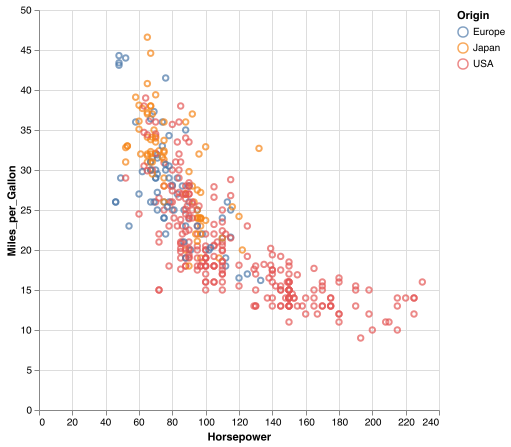

In [20]:
using VegaLite, VegaDatasets

dataset("cars") |>
@vlplot(
    :point,
    x=:Horsepower,
    y=:Miles_per_Gallon,
    color=:Origin,
    width=400,
    height=400
)

### Package.toml

* Julia environments are managed and described using in a format called TOML (Tom's obvious markup language) in a file Project.toml
* This file will be created and updated as needed by `Pkg` as we run `Pkg` commands
* Let's see what our new Project.toml looks like:

In [34]:
println(String(read("Project.toml")))

[deps]
VegaDatasets = "0ae4a718-28b7-58ec-9efb-cded64d6d5b4"
VegaLite = "112f6efa-9a02-5b7d-90c0-432ed331239a"



* This shows us we have a `[deps]` section with entries for the three packages we installed
* Each package line has the `NAME = UUID` syntax
* There can be other top level items (not in a section) and other sections
* We'll discuss these as they come up

### Manifest.toml

* Notice that the Project.toml file does not have any information about the version of our installed packages
* There is a companion file called Manifest.toml that does have this information
* Let's take a look:

In [35]:
println(String(read("Manifest.toml")))

# This file is machine-generated - editing it directly is not advised

julia_version = "1.11.6"
manifest_format = "2.0"
project_hash = "933e48d381787bff6d1dc3c57ff3487e8924b34d"

[[deps.ArgTools]]
uuid = "0dad84c5-d112-42e6-8d28-ef12dabb789f"
version = "1.1.2"

[[deps.Artifacts]]
uuid = "56f22d72-fd6d-98f1-02f0-08ddc0907c33"
version = "1.11.0"

[[deps.Base64]]
uuid = "2a0f44e3-6c83-55bd-87e4-b1978d98bd5f"
version = "1.11.0"

[[deps.BufferedStreams]]
git-tree-sha1 = "6863c5b7fc997eadcabdbaf6c5f201dc30032643"
uuid = "e1450e63-4bb3-523b-b2a4-4ffa8c0fd77d"
version = "1.2.2"

[[deps.CodecZlib]]
deps = ["TranscodingStreams", "Zlib_jll"]
git-tree-sha1 = "962834c22b66e32aa10f7611c08c8ca4e20749a9"
uuid = "944b1d66-785c-5afd-91f1-9de20f533193"
version = "0.7.8"

[[deps.Compat]]
deps = ["TOML", "UUIDs"]
git-tree-sha1 = "0037835448781bb46feb39866934e243886d756a"
uuid = "34da2185-b29b-5c13-b0c7-acf172513d20"
version = "4.18.0"
weakdeps = ["Dates", "LinearAlgebra"]

    [deps.Compat.extensions]
    

* The `Manifest.toml` file is a very comprehensive overview of ALL details about a Julia environment
* This file is rarely (if ever) touched by humans
* It can be used to reproduce an exact replica of the Julia version, packages, and package versions on any machine

### Set up environment on new machine

* If you are given a Project.toml/Manifest.toml combo, you can easily create a duplicate of teh author's Julia environment
* To do this follow these two steps:
    1. Call `Pkg.activate(".")`  (or `pkg> activate`) from the directory containing the .toml files
    2. Call `Pkg.instantiate()` (or `pkg> instantiate`)
* This will first activate the Project's environment in your current Julia session and then install all dependencies


In [2]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Teaching/UCF/CAP-6318/book-myst/week02`


## Package Development

* The vast majority of Julia itself -- including the packages in its standard library -- are written in Julia
* This means that to be a package author you really only need to know Julia
* Since you know Julia, you can author packages!
* The `Pkg` module has a [`generate`](https://pkgdocs.julialang.org/v1/creating-packages/) function to help us develop packages, however Julia authors reccomend using the first party `PkgTemplates.jl` package to start a new package
* So, we'll start by installing `PkgTemplates`


In [18]:
using Pkg
Pkg.add("PkgTemplates")

using PkgTemplates

   Resolving package versions...
   Installed PkgTemplates ─ v0.7.56
    Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Project.toml`
  [14b8a8f1] + PkgTemplates v0.7.56
    Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Manifest.toml`
  [e2ba6199] + ExprTools v0.1.10
  [78c3b35d] + Mocking v0.8.1
  [ffc61752] + Mustache v1.0.21
  [d96e819e] + Parameters v0.12.3
  [14b8a8f1] + PkgTemplates v0.7.56
  [bd369af6] + Tables v1.12.1
  [3a884ed6] + UnPack v1.0.2
Precompiling project...
   1669.1 ms  ✓ PkgTemplates
  1 dependency successfully precompiled in 2 seconds. 96 already precompiled.


### CAP6318

* As we progress throughout the semseter we will build up a toolbox of useful types and functions
* Let's organize these into a helpful package called `CAP6318`
* We can also use this package as a way to specify dependencies specifically required for the course
* To create our package we will need to follow the [PkgTemplates.jl documentation](https://juliaci.github.io/PkgTemplates.jl/stable/user/) to (1) establish the template for our project and (2) run the template on our project name

In [25]:
t = Template(;
    user="sglyon", # TODO: you change this!
    plugins=[PkgTemplates.Develop(), ]
)

package_dir = t("CAP6318")

┌ Info: Running prehooks
└ @ PkgTemplates /Users/sglyon/.julia/packages/PkgTemplates/5mBnk/src/template.jl:137
┌ Info: Running hooks
└ @ PkgTemplates /Users/sglyon/.julia/packages/PkgTemplates/5mBnk/src/template.jl:137
  Activating project at `~/.julia/dev/CAP6318`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/.julia/dev/CAP6318/Project.toml`
  No Changes to `~/.julia/dev/CAP6318/Manifest.toml`
Precompiling project...
    199.5 ms  ✓ CAP6318
  1 dependency successfully precompiled in 0 seconds
  Activating project at `~/Teaching/UCF/CAP-6318/book-myst/week02`
┌ Info: Running posthooks
└ @ PkgTemplates /Users/sglyon/.julia/packages/PkgTemplates/5mBnk/src/template.jl:137
   Resolving package versions...
    Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Project.toml`
  [8b4527b1] + CAP6318 v1.0.0-DEV `~/.julia/dev/CAP6318`
    Updating `~/Teaching/UCF/CAP-6318/book-myst/week02/Manifest.toml`
  [8b4527b1] + CAP6318 v1.0.0-DEV `~/.julia/dev/CAP6318`
┌ I

"/Users/sglyon/.julia/dev/CAP6318"

* Notice that the code generated a new project in `~/.julia/dev/CAP6318`
* Let's take a look at was created for us

* Let's see what was created for us

In [26]:
cmd =`tree $package_dir`
println("About to run: $cmd")
run(cmd);

About to run: `tree /Users/sglyon/.julia/dev/CAP6318`
/Users/sglyon/.julia/dev/CAP6318
├── LICENSE
├── Manifest.toml
├── Project.toml
├── README.md
├── src
│   └── CAP6318.jl
└── test
    └── runtests.jl

3 directories, 6 files


* Here we see a LICENSE, Manifest.toml/Project.toml pair, and a README.md (for usage instructions) in the top folder
* Then inside `src/` we have a module file `CAP6318.jl`
* Inside `test/` we have a `runtests.jl` file
* Let's peek inside the files

In [39]:
print_pkg_file(parts::String...) = println(String(read(joinpath(package_dir, parts...))))
print_pkg_file("Project.toml")

name = "CAP6318"
uuid = "8b4527b1-c17c-4ce8-a82d-b872f04552bb"
authors = ["Spencer Lyon <spencerlyon2@gmail.com> and contributors"]
version = "1.0.0-DEV"

[compat]
julia = "1.6.7"

[extras]
Test = "8dfed614-e22c-5e08-85e1-65c5234f0b40"

[targets]
test = ["Test"]



In [40]:
print_pkg_file("src", "CAP6318.jl")

module CAP6318

# Write your package code here.

end



In [41]:
print_pkg_file("test", "runtests.jl")

using CAP6318
using Test

@testset "CAP6318.jl" begin
    # Write your tests here.
end



* Ok, we have a nicely structured starting point
* We will add to this throughout the course

### Exercise

Perform the following tasks

1. Activate the project by doing `activate CAP6318`. Because we specified `Develop()` in our template and this is the package name we do not need to be in the same directory or pass the directory path
2. Install `CSV, DataFrames, VegaLite, Graphs` in the CAP6318 project. We'll use them later
3. Ensure that you installed these correctly by using the `print_pkg_file` function above and looking for the `[deps]` section
4. Create a new function `greet() = println("Hello from CAP6318")` in your `src/CAP6318.jl` module file. Note you will have to open this file in your text editor
5. Call `using CAP6318` then run `greet()` to see your message